**Homework Day 13 - Data Manipulation with Python**

**Author: Ahmad Ichsan Baihaqi**

**Email: ahmadichsanbaihaqi@gmail.com**

In [138]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [139]:
missing_values = [" "]
data = pd.read_csv('Telco-Customer-Churn.csv', na_values = missing_values)

In [140]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [141]:
print(data['Churn'].isna().sum())
print(data['Churn'].isnull().sum())

0
0


**QUESTION ONE**

In [146]:
percentage_data = pd.DataFrame({
        'Churn Status': data['Churn'].unique(),
        'Percentage User': [item for item in data.groupby('Churn').size().transform(lambda x: (x/sum(x))*100)],
})

In [147]:
percentage_data

,Churn Status,Percentage User
0,No,73.463013
1,Yes,26.536987


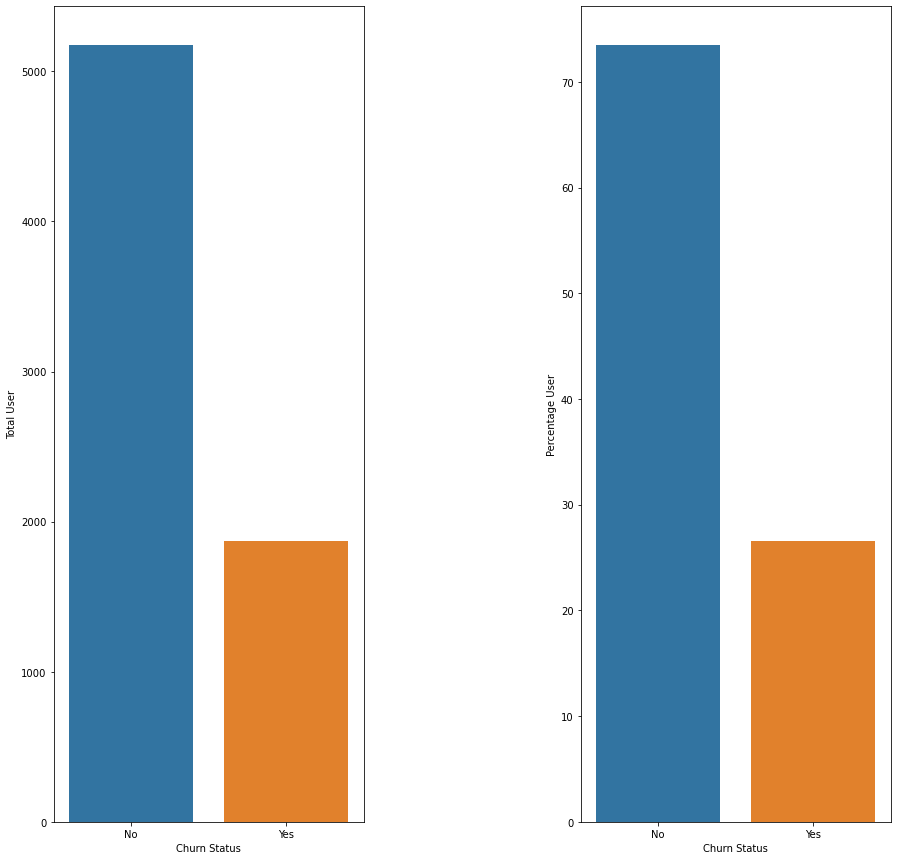

In [148]:
ig, axs = plt.subplots(1, 2, figsize=(15, 15))

sns.countplot(
    data = data,
    x = "Churn",
    ax = axs[0]
).set(xlabel = "Churn Status", ylabel = "Total User")

sns.barplot(
    data=percentage_data,
    x = "Churn Status",
    y = "Percentage User",
    ax=axs[1]
)

plt.subplots_adjust(wspace = 0.7)

plt.show()

**QUESTION TWO**

In [149]:
# find missing value

data['TotalCharges'].isna().sum()

11

In [150]:
# handle missing value
# use zero, since missing value in TotalCharges is only occured when Tenure is zero. It means, user not charged yet.

data['TotalCharges'].fillna(value = 0.00, inplace = True)

In [151]:
# crosscheck missing value

data['TotalCharges'].isna().sum()

0

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

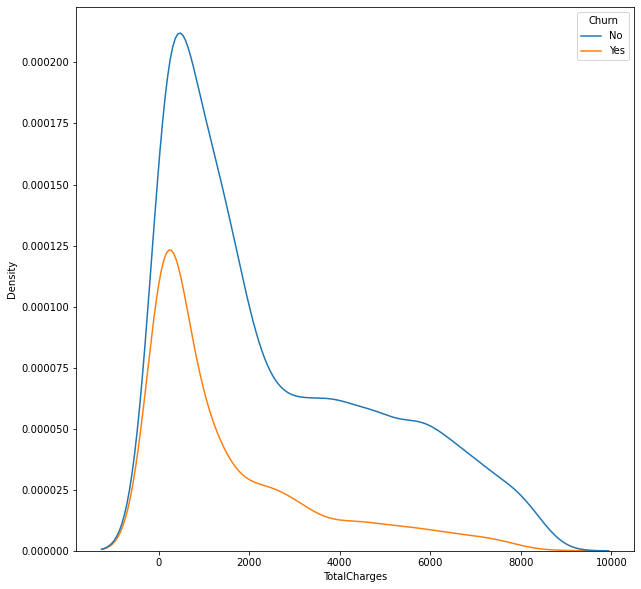

In [152]:
fig, ax = plt.subplots(figsize=(10,10))

sns.kdeplot(data['TotalCharges'], hue=data["Churn"])